In [1]:
EXPERIMENT_FOLDER_PATH = "../reports/experiments/2019-1-27_10-42/" 

In [14]:
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
rowList = []
for f in os.listdir(EXPERIMENT_FOLDER_PATH):
    if "best_policies" in f:
        epoch = int(f.split(".")[0].replace("epoch",""))
        max_val_acc_str = f.split(".")[1].split("_")[-1]
        max_val_acc = float("0." + max_val_acc_str)
        df = pd.read_csv(EXPERIMENT_FOLDER_PATH + f)
        rowList.append([epoch, max_val_acc, df["0"].values])
        
max_val_acc_df = pd.DataFrame(rowList, columns=["epoch","max_val_acc","best_policy"])
max_val_acc_df.sort_values("epoch", inplace=True)
max_val_acc_df.head()

,epoch,max_val_acc,best_policy
214,0,0.277,"[Operation 0 (P=0.100, M=0.033)\nOperation 10..."
343,1,0.240,"[Operation 5 (P=0.000, M=0.222)\nOperation 3..."
537,2,0.265,"[Operation 12 (P=0.400, M=1.900)\nOperation 4..."
116,3,0.260,"[Operation 3 (P=0.900, M=0.050)\nOperation 3..."
306,4,0.221,"[Operation 10 (P=0.000, M=1.900)\nOperation 3..."


Text(0, 0.5, 'maximum validation accuracy of child model')

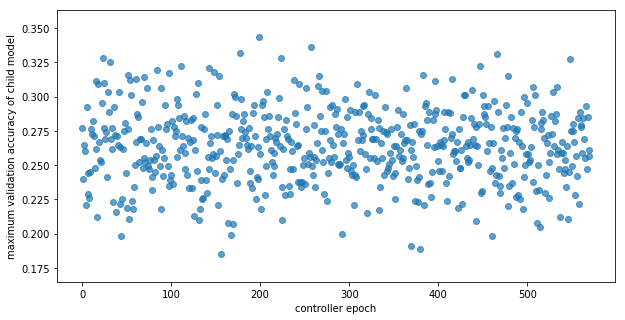

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(max_val_acc_df["epoch"].values, max_val_acc_df["max_val_acc"].values, alpha=0.7)
plt.xlabel("controller epoch")
plt.ylabel("maximum validation accuracy of child model")

Text(0.5, 1.0, 'Distribution of maximum validation accuracies from child model')

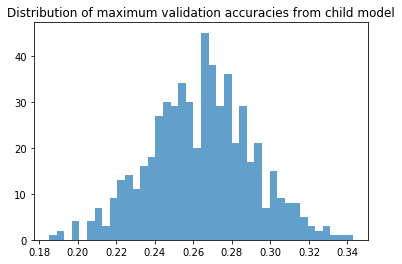

In [47]:
_ = plt.hist(max_val_acc_df["max_val_acc"].values, bins=40, alpha=0.7)
plt.title("Distribution of maximum validation accuracies from child model")

## Can two sample have same policy?

In [37]:
max_val_acc_df["best_policy"].astype(str).values.__len__() == \
max_val_acc_df["best_policy"].astype(str).unique().__len__()

True